7.82_mining_info_with_hypothesis_testing

In [1]:
import numpy as np
import pandas as pd

# 引入绘图相关库
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# 引入t检验相关函数
from scipy.stats import ttest_ind

# 引入Z检验相关函数
from statsmodels.stats.weightstats import ztest

### 一、用代码实现t检验

#### (一)、Knowledge

1. SciPy
   
- 做t检验，可以用SciPy这个库。SciPy和Pandas一样，都是建立在NumPy之上的

- `SciPy.stats`模块，有很多和统计分析有关的函数和类

- `SciPy.stats`模块中的`ttest_ind`函数，就是一个专门用来做独立双样本t检验的函数，'ind'是independent的简写

2. p值：如果总体之间不存在显著差异，那样本之间存在当前这种差异或更极端的差异，有多大概率。

- p值小，假设总体之间没有显著差异的话，样本有这样的差异是小概率事件，应该拒绝原假设

- p值大，假设总体之间没有显著差异的话，样本有这样的差异是大概率事件，应该接受原假设

#### (二)、步骤

In [2]:
height_df = pd.read_csv('height.csv')
height_df

,身高,地区
0,165,A
1,167,A
2,172,A
3,176,A
4,178,A
5,180,A
6,182,A
7,183,A
8,185,A
9,188,A


1. 引入t检验相关函数

2. 筛选两独立样本的Series

In [3]:
region_a_height = height_df.query('地区 == "A"')['身高']
region_b_height = height_df.query('地区 == "B"')['身高']

In [4]:
region_a_height

0    165
1    167
2    172
3    176
4    178
5    180
6    182
7    183
8    185
9    188
Name: 身高, dtype: int64

In [5]:
region_b_height

10    155
11    158
12    160
13    162
14    165
15    168
16    172
17    176
18    179
19    182
Name: 身高, dtype: int64

In [6]:
# 替换成Microsoft YaHei字体
matplotlib.rc("font",family='Microsoft YaHei')

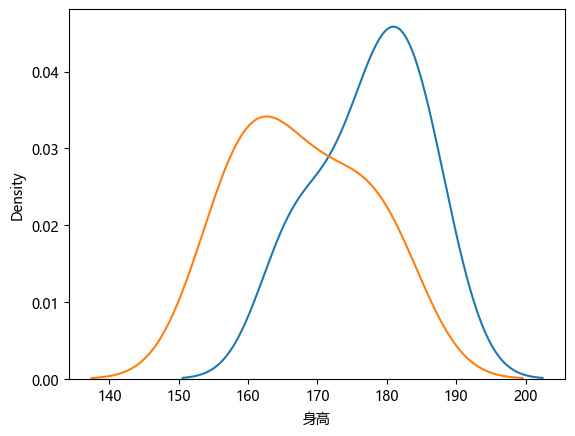

In [7]:
sns.kdeplot(region_a_height)
sns.kdeplot(region_b_height)
plt.show()

3. 建立假设

   **带括号的步骤只需要在脑袋里过一下或稍微记录一下**

In [8]:
# (原假设(H0):地区A和地区B的人平均身高没有差异)
# (备择假设(H1)：地区A和地区B 的人平均身高有差异)

4. 选择单尾/双尾

In [9]:
# (选择双尾检验)

5. 确定显著水平

In [10]:
alpha = 0.05

6. 计算t值和p值

- 调用ttest_ind函数，分别传入两样本的Series，ttest_ind函数会返回t检验的结果，里面包含两个数字，第一个表示t值，第二个表示p值

- **ttest_ind函数默认计算的是双尾的p值，如果是单尾检验，单尾的p值等于返回的p值除以二**

- **之所以双尾检验p值是单尾检验p值的2倍，是人为x2的结果。可以想象单尾检验的p值为，一样本平均值，落在另一样本正态分布图中的面积；而由于双尾检验显著水平为，一样本平均值落入另一样本两边的面积，所以人为将p值x2，用两倍的面积和两边的面积去比较**

In [11]:
t_stat, p_value = ttest_ind(region_a_height, region_b_height)
print(t_stat, p_value)

2.608375959216796 0.017783305969556976


7. 比较p值和显著水平

In [12]:
# (把p值和显著水平进行比较，这里计算出的p值是0.018左右，小于0,05。
# 说明当原假设为真时，当前样本出现这种差异的概率很小，而且比我们选择的显著水平更小，因此应该拒绝原假设，换句话说，我们推断总体的平均值确实存在差异。)
if p_value < alpha:
    print('两组数据有显著差异')
else:
    print('两组数据无显著差异')

两组数据有显著差异


**用代码做t检验的步骤，比上一节学的更加简洁和高效。我们不需要去看t值具体是多少，不需要去查t值临界值表，也不需要对比t值和临界值。只需要直接对比p值和显著水平，就能得到结论，到底是拒绝还是接受原假设**

### 二、用代码实现Z检验 

#### (一)、Knowledge

1. statsmodels

   计算Z值和p值，可以用statsmodels.stats.weightstats模块的ztest函数 

#### (二)、步骤

用Python做Z检验，整个步骤和t检验很相似

In [13]:
height_df2 = pd.read_csv('height2.csv')
height_df2

,身高,地区
0,175,A
1,169,A
2,176,A
3,185,A
4,168,A
...,...,...
61,173,B
62,164,B
63,163,B
64,183,B


1. 引入Z检验相关函数

2. 筛选两独立样本的Series

In [14]:
region_a_height2 = height_df2.query('地区 == "A"')['身高']
region_b_height2 = height_df2.query('地区 == "B"')['身高']

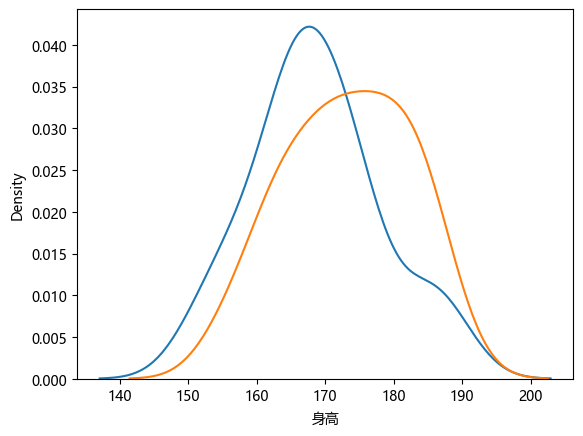

In [15]:
sns.kdeplot(region_a_height2)
sns.kdeplot(region_b_height2)
plt.show()

3. 建立假设

4. 选择单尾/双尾

5. 确定显著水平

In [16]:
alpha = 0.05

6. 计算Z值和p值

- 调用ztest函数，分别传入两样本，ztest函数返回两个数字，第一个表示Z值，第二个表示p值

    - 传入可选参数`alternative='two-sided'`，表示双尾
 
    - 如果是单尾的话，传入可选参数`alternative='larger'`，表示想推断第一个的均值，是否显著大于第二个
 
    - 传入可选参数`alternative='smaller'`，表示想推断第一个的均值，是否显著小于第二个

In [17]:
z_stat, p_value = ztest(region_a_height2, region_b_height2, alternative='two-sided')
print(z_stat, p_value)

-1.9906963757270788 0.04651427741343414


7. 比较p值和显著水平

In [18]:
if p_value < alpha:
    print('两组数据有显著差异')
else:
    print('两组数据无显著差异')

两组数据有显著差异


In [19]:
# 建立假设
# 原假设：
# 备择假设：地区A的人平均身高小于地区B 的人的平均身高

alpha = 0.025

# 计算z值和p值（单尾负差异）
z_stat, p_value = ztest(region_a_height2, region_b_height2, 
                        alternative='smaller')
print(z_stat, p_value)

if p_value < alpha:
    print('两组数据有显著差异')
else:
    print('两组数据无显著差异')

-1.9906963757270788 0.02325713870671707
两组数据有显著差异
